In this example, we setup another simple reaction $ A + B \leftrightarrow C$ with forward rate const $k_f = 1$ and backward rate constant $k_b = 0.1$. Other parameters are same as in [previous example](./simple_reaction_1.ipynb).

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy
import moose

As before, we need to create a compartment in which reaction takes place. In this compartment, we add chemical species and initialize their concentration.

In [2]:
# Compartment
compt = moose.CubeMesh('/compt')
compt.volume = 1e-15

# Reactants and product
a = moose.Pool('/compt/chemA')
a.concInit = 10.0
b = moose.Pool('/compt/chemB')
b.concInit = 5.0
c = moose.Pool('/compt/chemC')
c.concInit = 0.0

Now, we setup `moose.Reac` as before. This time, backward rate constant is non-zero.

In [3]:
# Reaction in MOOSE.
reac = moose.Reac('/compt/reac')
reac.connect('sub', a, 'reac')  # substrate
reac.connect('sub', b, 'reac')  # substrate
reac.connect('prd', c, 'reac')  # product of reaction

# Rate constants
reac.Kf = 1.0
reac.Kb = 0.1

Let't set our recorders and use a finer time-step on clocks to get better numerical accuracy.

In [4]:
outputA = moose.Table2('/a')
outputB = moose.Table2('/b')
outputC = moose.Table2('/c')
outputA.connect('requestOut', a, 'getConc')
outputB.connect('requestOut', b, 'getConc')
outputC.connect('requestOut', c, 'getConc')

# Making time-step value smaller to increase accuracy.
for i in range(11, 15):
    moose.setClock(i, 0.001)  # 0.001 seconds step size

Let's simulate for 10 seconds and plot the results. We are expecting $\frac{[c]}{[a][b]} = \frac{k_f}{k_b} = 10$. 

In [5]:
moose.reinit()
moose.start(10)

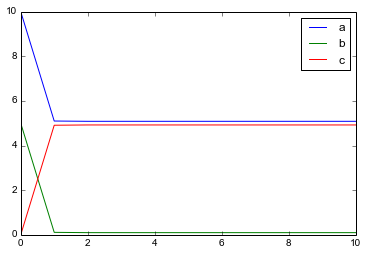

In [6]:
for table in [outputA, outputB, outputC]:
    t = numpy.arange(0, table.vector.size, 1)  # seconds
    plt.plot(t, table.vector, label = table.name)
plt.legend()
plt.show()

### Verification of results

To verify that we are getting expected values at equilibrium, we get the equilibrium values of `a`, `b`, and `c`. 

In [7]:
a_final, b_final, c_final = outputA.vector[-1], outputB.vector[-1], outputC.vector[-1]

In [9]:
print("%s,%s,%s" % (c_final, a_final, b_final))
print(c_final / (a_final * b_final))

4.92150366219,5.08454537002,0.0967933867048
10.0


Which is correct.